In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# sigularities
def sing(x,a,n):
    if not isinstance(x, np.ndarray):
        x = np.array([x])
    ni = np.zeros(x.size)
    for i in range(x.size):
        if x[i] >=a and n>=0:
            ni[i] = (x[i]-a)**n
    return ni/np.math.factorial(n)

def lx(a,pc,pp=None):
    xxi = pp if pp is not None else xx
    return m*((1-pc)*sing(xxi,0,a)-p1(pc)*sing(xxi,l0,a)-p2(pc)*sing(xxi,l1,a)+pc/2*(sing(xxi,lw1,a)+sing(xxi,lw2,a)))

def p1(pc):
    return 2.5-2.4625*pc

def p2(pc):
    return 2.4625*pc-1.5

def trail(a,b,pc, l2,l3):
    return m*(p1(pc)*sing(xt,0,a)+p2(pc)*sing(xt,80,a)-(sing(xt,l3,b)-sing(xt,l3+l2,b))/l2)

def lx1(a,pc,dl):
    m*((1-pc)*sing(xx,0,a)-p1(pc)*sing(xx,l0,a)-0.5*sing(xx,dl,a)-p2(pc)*sing(xxi,l1,a)+pc/2*(sing(xxi,lw1,a)+sing(xxi,lw2,a)))

In [0]:
class skidSteer:
    def __init__(self):
        self.m =18400
        self.mb = 10000 # at back
        self.wheel_b = 48
skid = skidSteer()        

In [3]:
#constants
l1 = 200
l0 =120
lw1 = 179
lw2 = 215
m = 18400
S = 5.61
s2 = 5.46


note case on full front, case on half front,

case on back



In [4]:
# predefined arrays
xx = np.linspace(0,220)
xt = np.linspace(0,150)
lii = np.linspace(10, 120, 15)



In [5]:
o_m_l = []
max_loc = []
m_full = []

o_m_l_t = []
max_loc_t = []
m_full_t = []

# loop through locations
for lis in lii:

    # initialize constants for each
    max_p = [[0,0]]
    l_f = []

    max_p_t = [[0,0]]
    l_f_t = []

#     min_x_x = lis/40
    
#     print('-minx: ', min_x)
    for p in np.arange(0.6,1,0.1):
        l4 = 197*p-lis/2-120  # calculates resulting length

        #singularity
        load = lx(0,p)
        mom = lx(1,p)
        tip_l = trail(0,1,p, lis,l4)
        tip_m = trail(1,2,p, lis,l4)
        sig = mom/(2*S)  # stress
        sig_t = tip_m/(2*s2)

        l_f.append([load, mom, sig])
        max_sig = np.max(np.abs(sig))

        max_p.append([p*1, max_sig*1])  # max stress for this loading condition and this location

        l_f_t.append([tip_l, tip_m, sig_t])
        max_sig_t = np.max(np.abs(sig_t))

        max_p_t.append([p*1, max_sig_t*1])  # max stress for this loading condition and this location

    # tabulation of this location, and max of location
    max_p = np.array(max_p)
    m_full.append(l_f)
    m_n = np.argmax(max_p,0)
    m_a = max_p[m_n[1],:]

    # adding to list of all locs
    max_loc.append(max_p)
    o_m_l.append(m_a)
    
    # tabulation of this location, and max of location
    max_p_t = np.array(max_p_t)
    m_full_t.append(l_f_t)
    m_n_t = np.argmax(max_p_t,0)
    m_a_t = max_p_t[m_n_t[1],:]

    # adding to list of all locs
    max_loc_t.append(max_p_t)
    o_m_l_t.append(m_a_t)

# max of all
o_m_l = np.array(o_m_l)
m_aa = np.argmax(o_m_l,0)

m_aaa = o_m_l[m_aa[1],:]

o_m_l_t = np.array(o_m_l_t)
m_aa_t = np.argmax(o_m_l_t,0)

m_aaa_t = o_m_l_t[m_aa_t[1],:]

# max for each percent, len
for i in range(len(max_loc)):
    print(f'\n------------loading for Dis load len: {round(lii[i],1)}(in)')
    for ii in max_loc[i]:
        print(f'at rear load: {int(ii[0]*100)}% = Max \u03C3: {round(ii[1],2)}(psi)')
print(f'\n--------------------\n')

ni = 0
# max for each len
for i in o_m_l:
    print(f'max at len: {round(lii[ni],1)}(in), rear load: {int(i[0]*100)}%, \u03C3 = {round(i[1], 2)}(psi)')
    ni +=1
    
print(f'\n--------------------\noverall max at len(in): {round(lii[m_aa[1]], 2)}, rear load: {int(m_aaa[0]*100)}%,  \u03C3 = {round(m_aaa[1], 2)}(psi)')
# max for each percent, len
print(f'\n\n--------------------\ntrailer\n--------------------\n')
for i in range(len(max_loc_t)):
    print(f'\n------------loading for Dis load len: {round(lii[i],1)}(in)')
    for ii in max_loc_t[i]:
        print(f'at rear load: {int(ii[0]*100)}% = Max \u03C3: {round(ii[1],2)}(psi)')
print(f'\n--------------------\n')

ni = 0
# max for each len
for i in o_m_l_t:
    print(f'max at len: {round(lii[ni],1)}(in), rear load: {int(i[0]*100)}%, \u03C3 = {round(i[1], 2)}(psi)')
    ni +=1
print(f'\n--------------------\noverall max at len(in): {round(lii[m_aa_t[1]], 2)}, rear load: {int(m_aaa_t[0]*100)}%,  \u03C3 = {round(m_aaa_t[1], 2)}(psi)')


------------loading for Dis load len: 10.0(in)
at rear load: 0% = Max σ: 0.0(psi)
at rear load: 60% = Max σ: 77466.55(psi)
at rear load: 70% = Max σ: 58081.09(psi)
at rear load: 80% = Max σ: 38695.62(psi)
at rear load: 89% = Max σ: 19310.16(psi)

------------loading for Dis load len: 17.9(in)
at rear load: 0% = Max σ: 0.0(psi)
at rear load: 60% = Max σ: 77466.55(psi)
at rear load: 70% = Max σ: 58081.09(psi)
at rear load: 80% = Max σ: 38695.62(psi)
at rear load: 89% = Max σ: 19310.16(psi)

------------loading for Dis load len: 25.7(in)
at rear load: 0% = Max σ: 0.0(psi)
at rear load: 60% = Max σ: 77466.55(psi)
at rear load: 70% = Max σ: 58081.09(psi)
at rear load: 80% = Max σ: 38695.62(psi)
at rear load: 89% = Max σ: 19310.16(psi)

------------loading for Dis load len: 33.6(in)
at rear load: 0% = Max σ: 0.0(psi)
at rear load: 60% = Max σ: 77466.55(psi)
at rear load: 70% = Max σ: 58081.09(psi)
at rear load: 80% = Max σ: 38695.62(psi)
at rear load: 89% = Max σ: 19310.16(psi)

-----------

/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_821/4095886525.py:15: UserWarn

/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_821/4095886525.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_821/4095886525.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


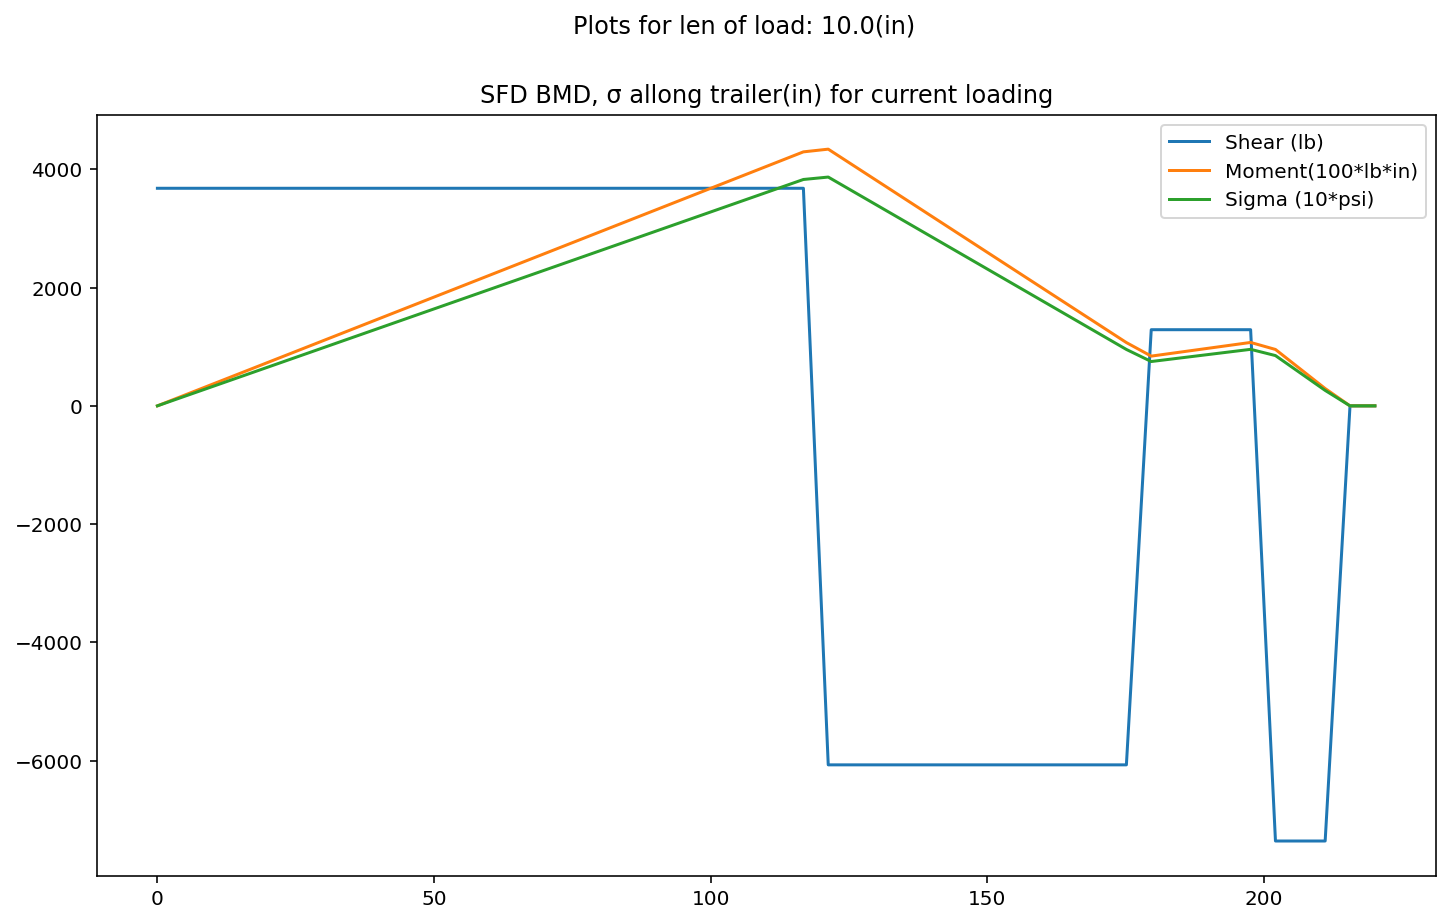

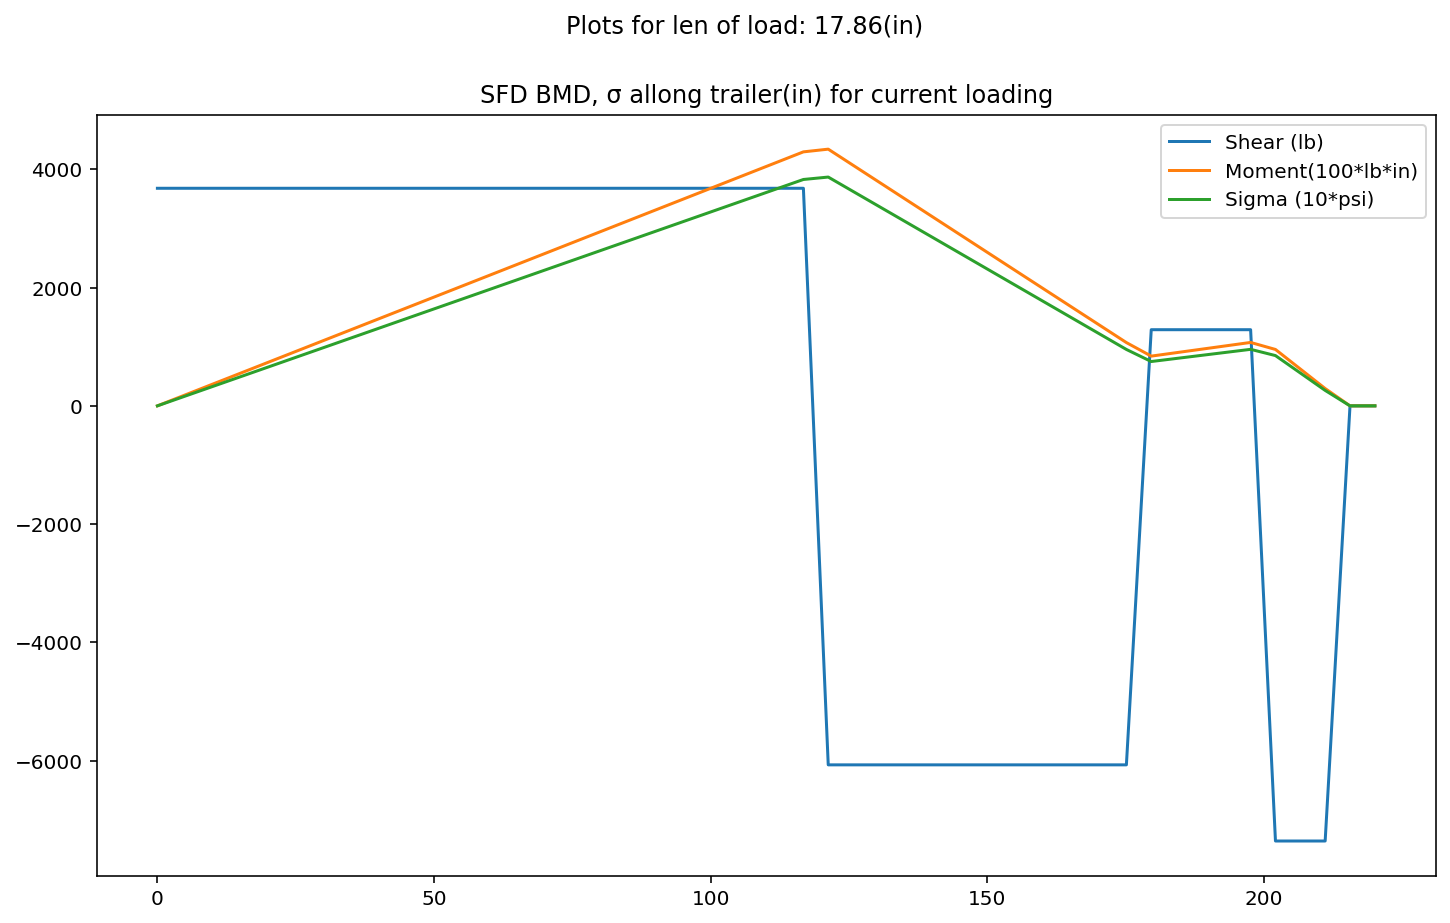

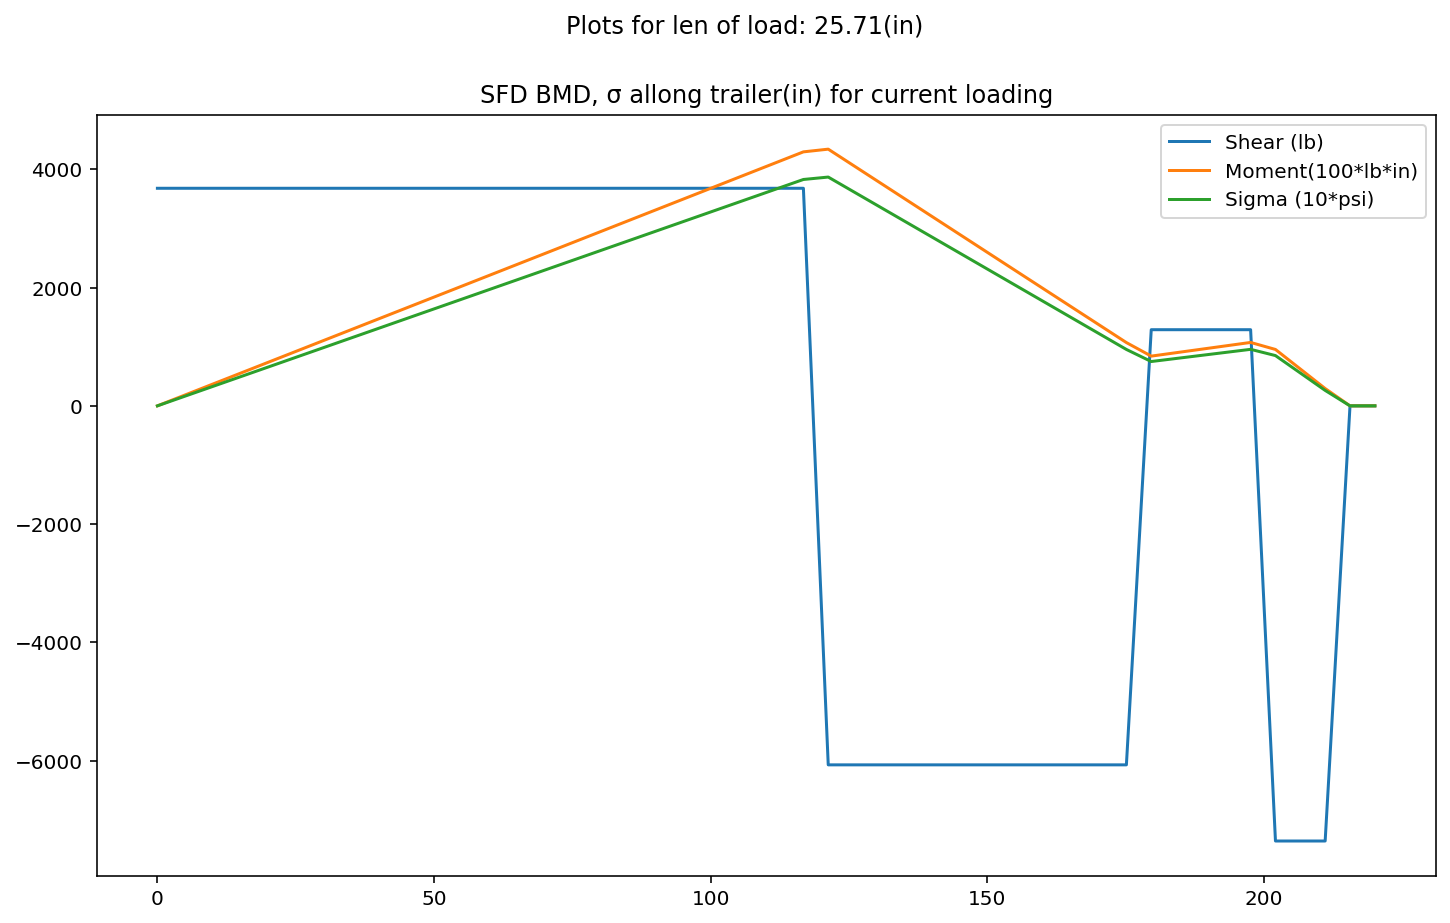

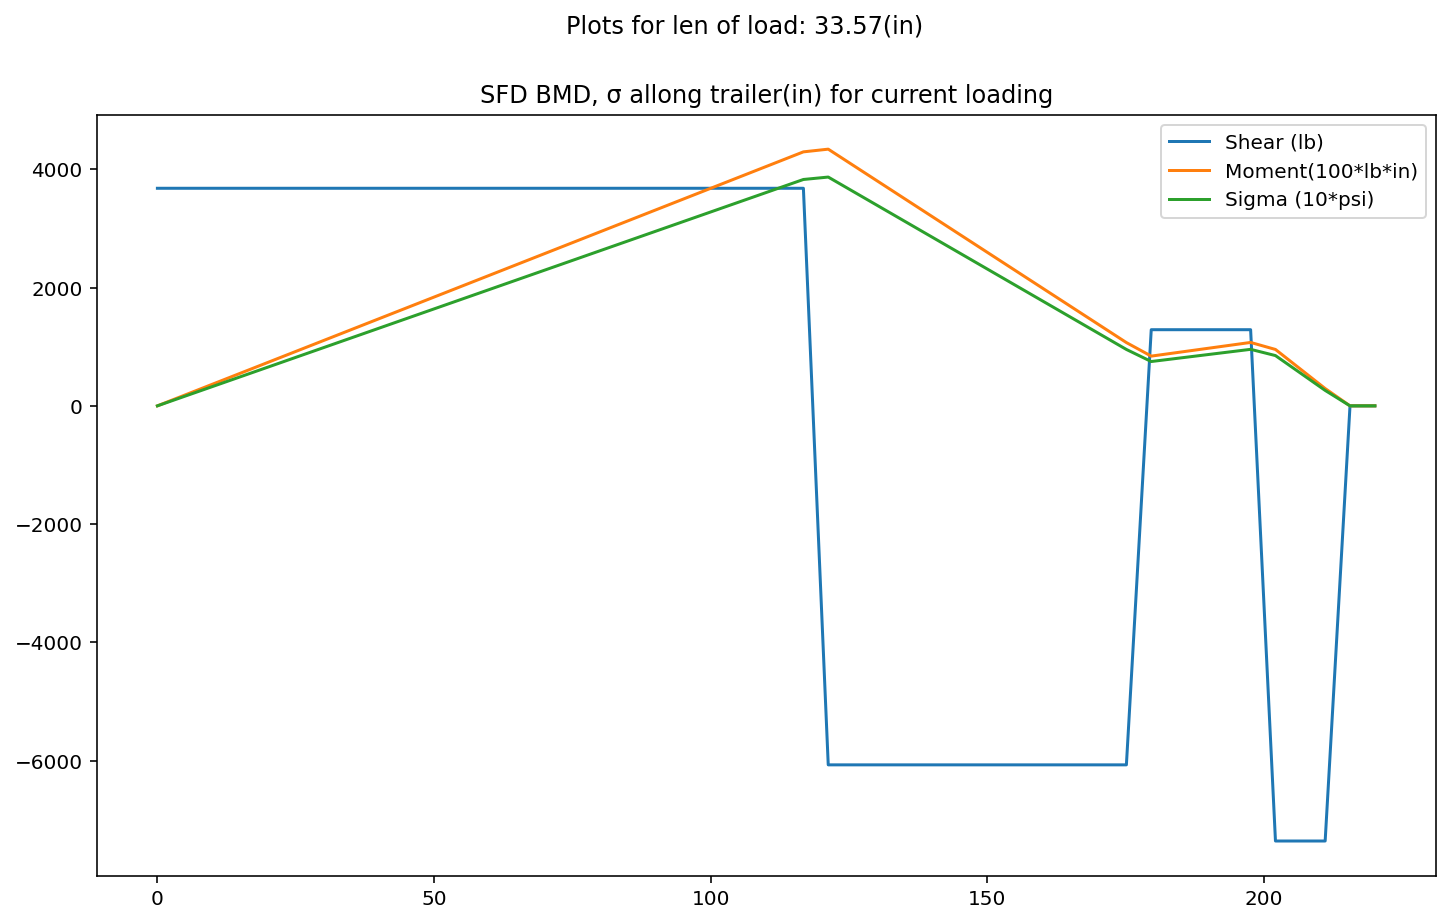

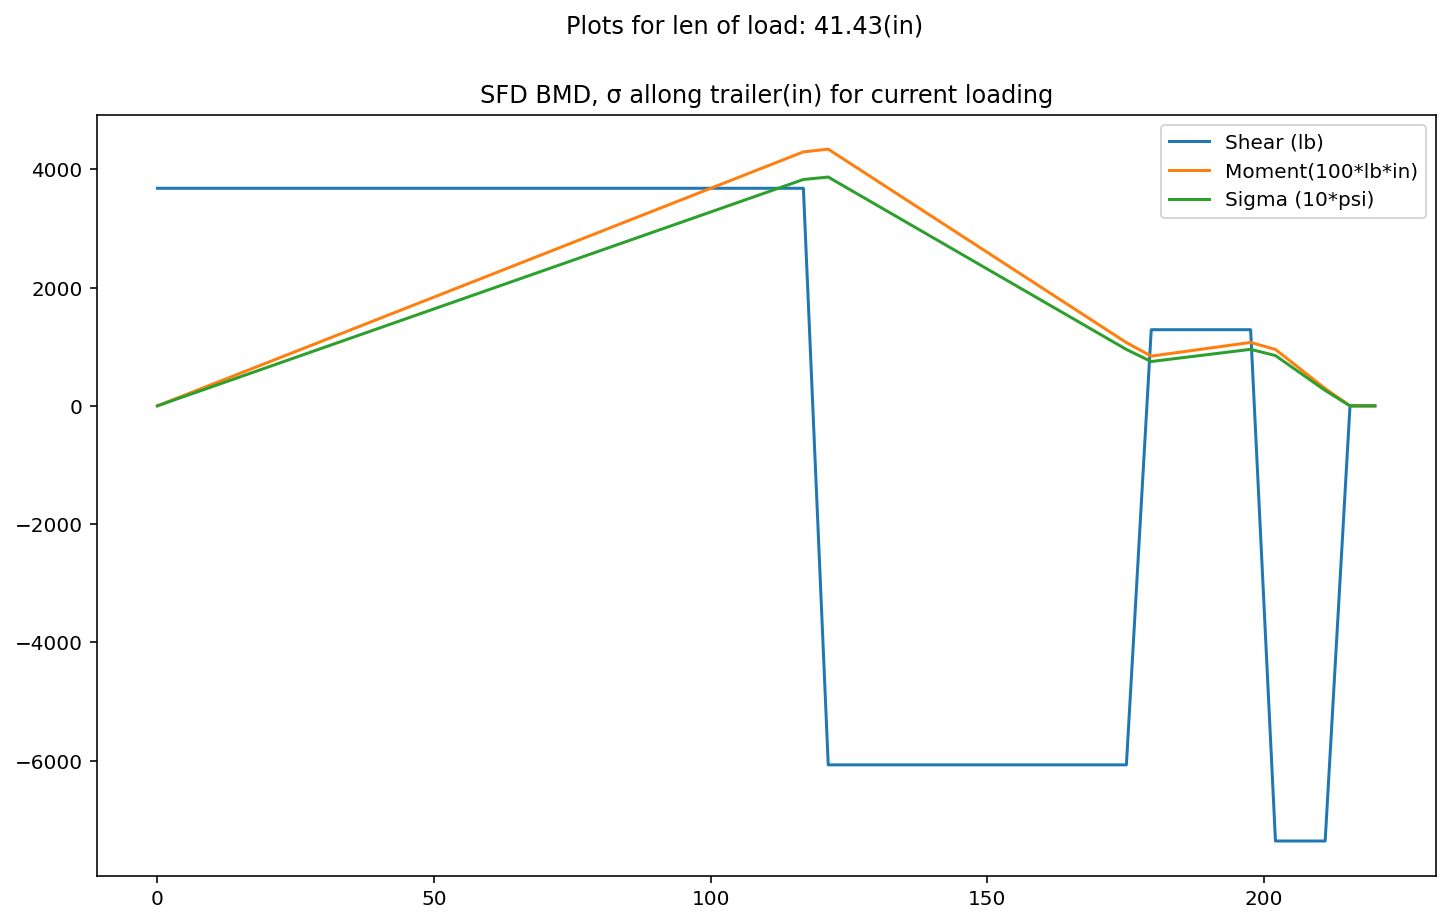

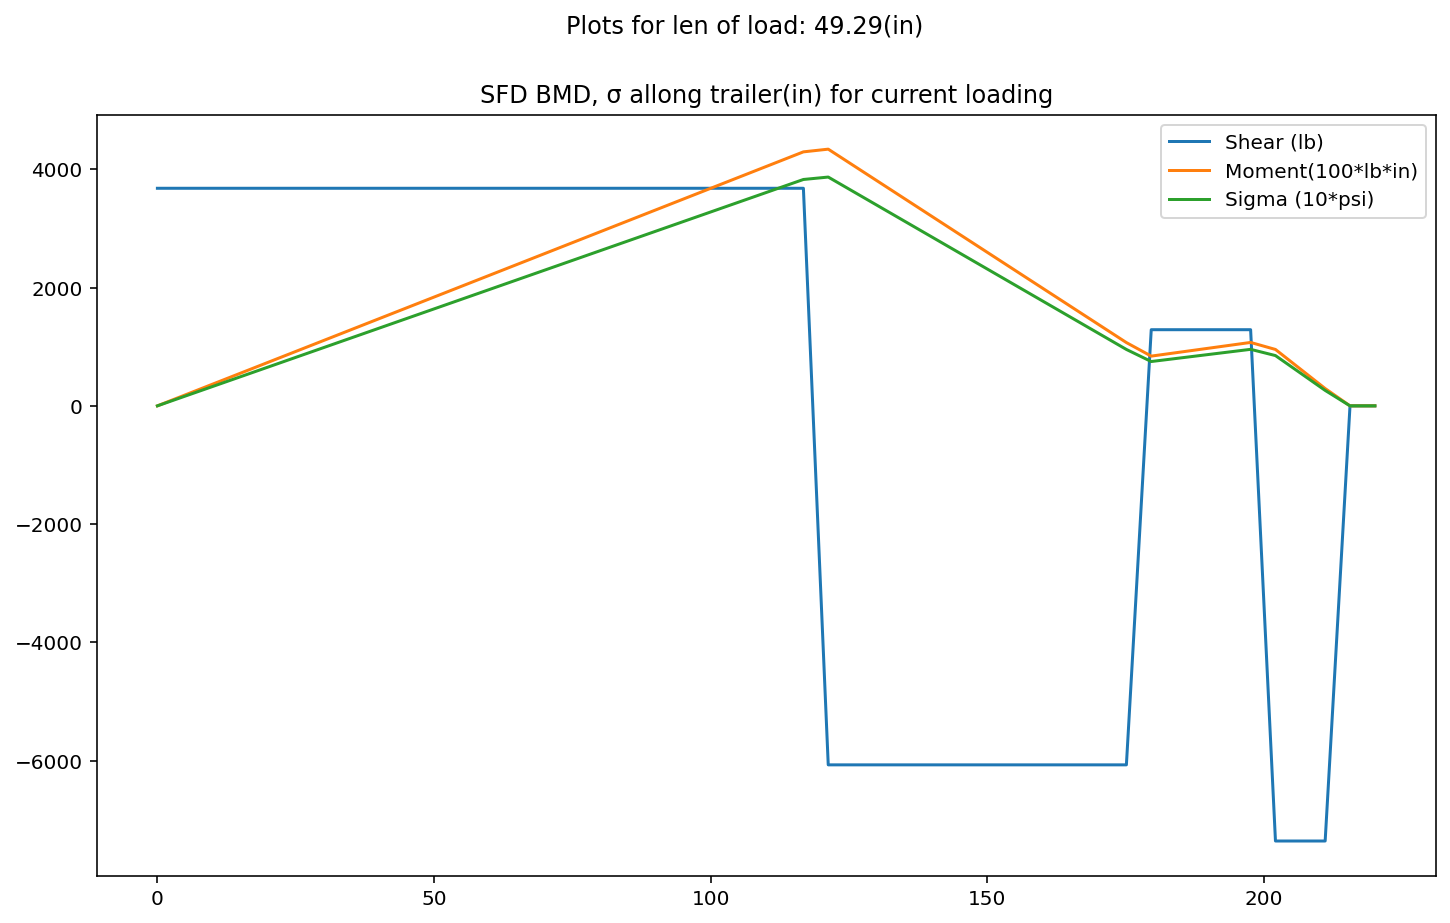

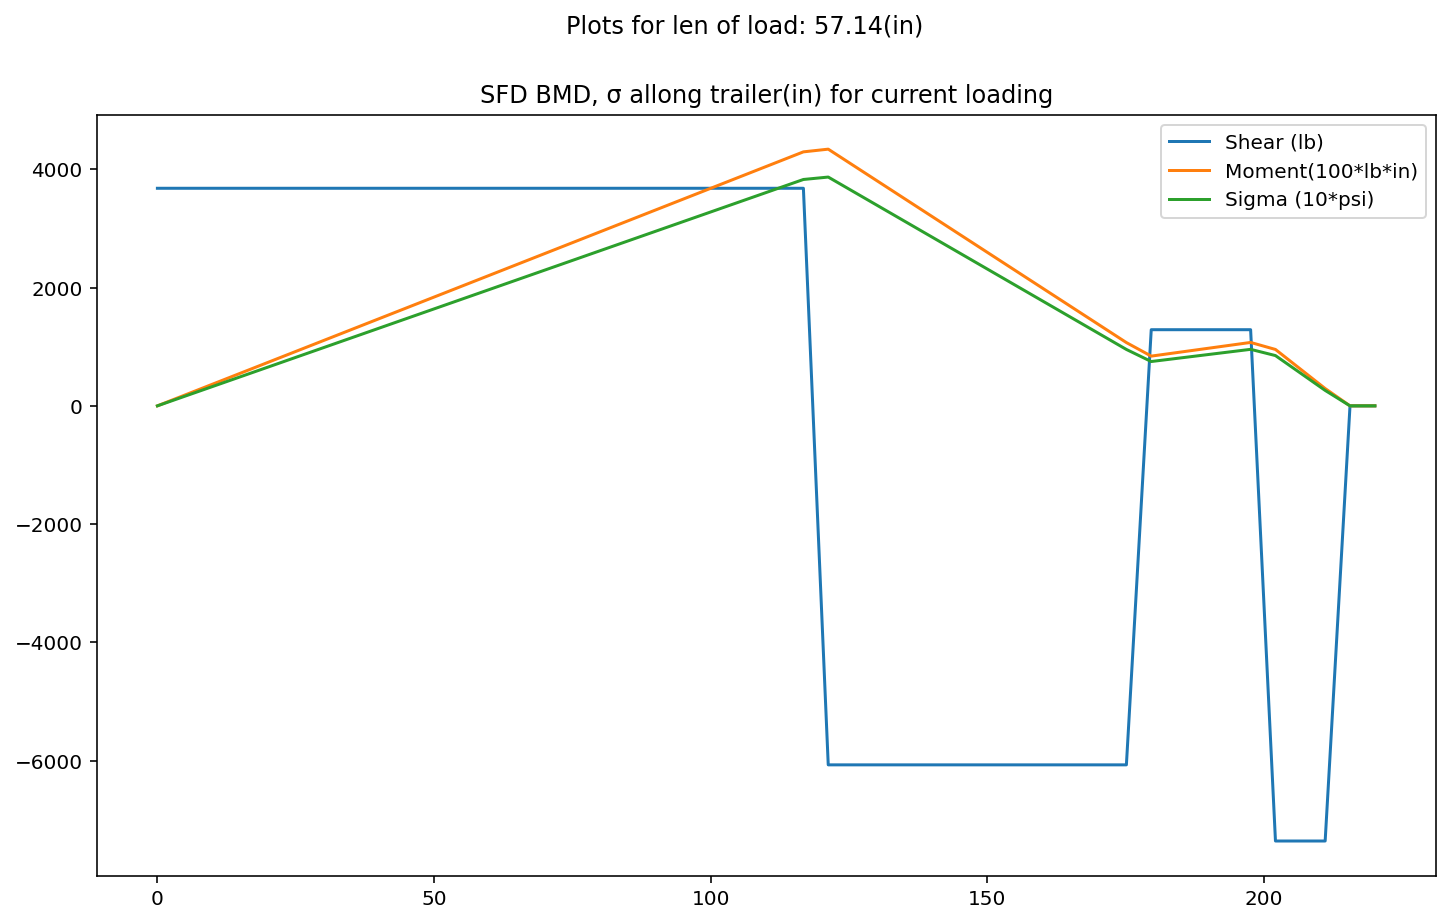

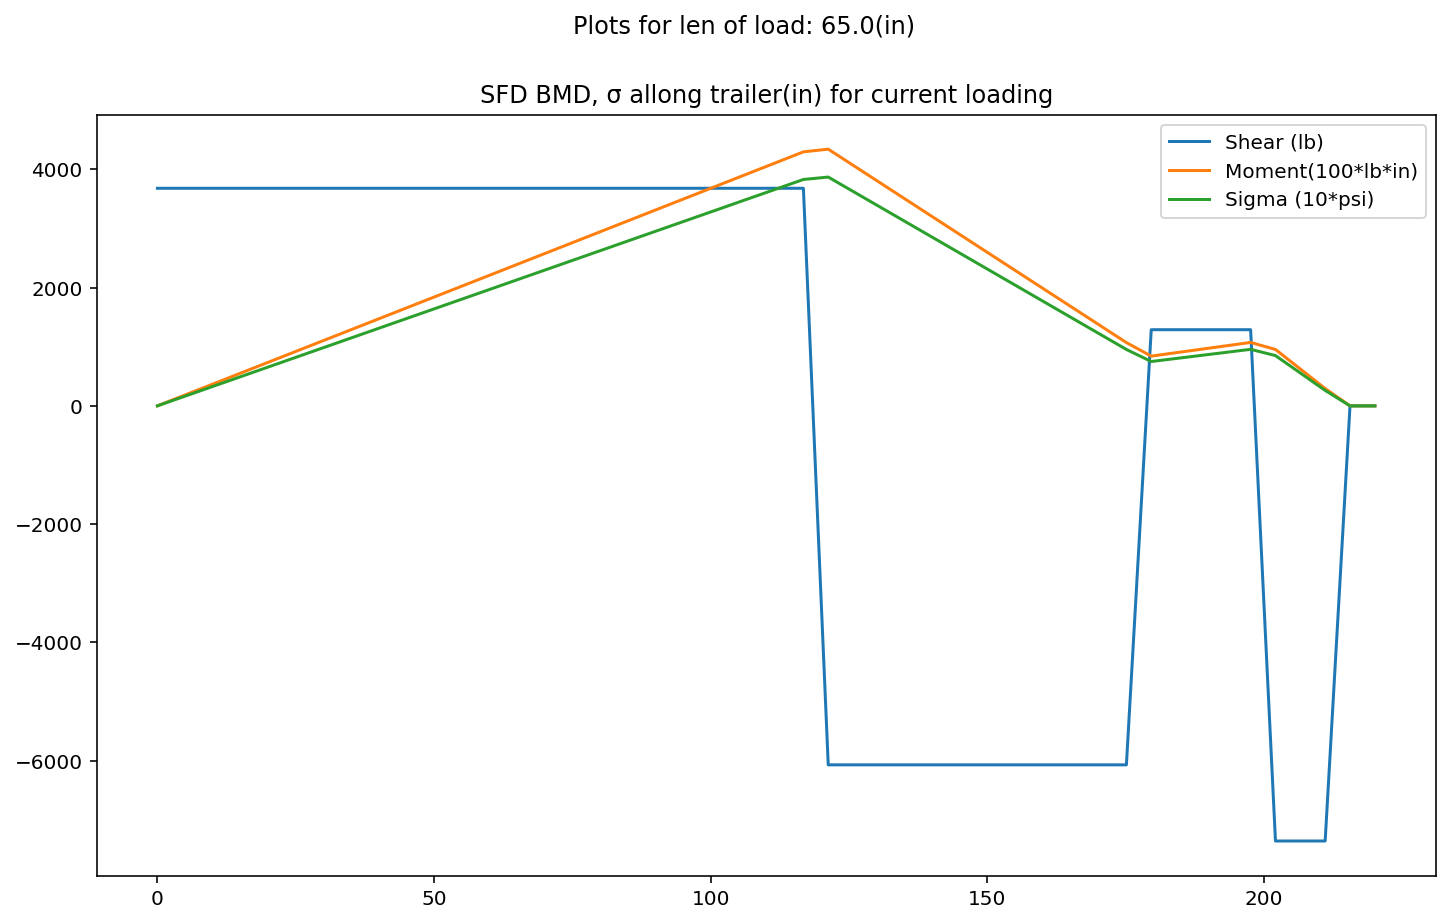

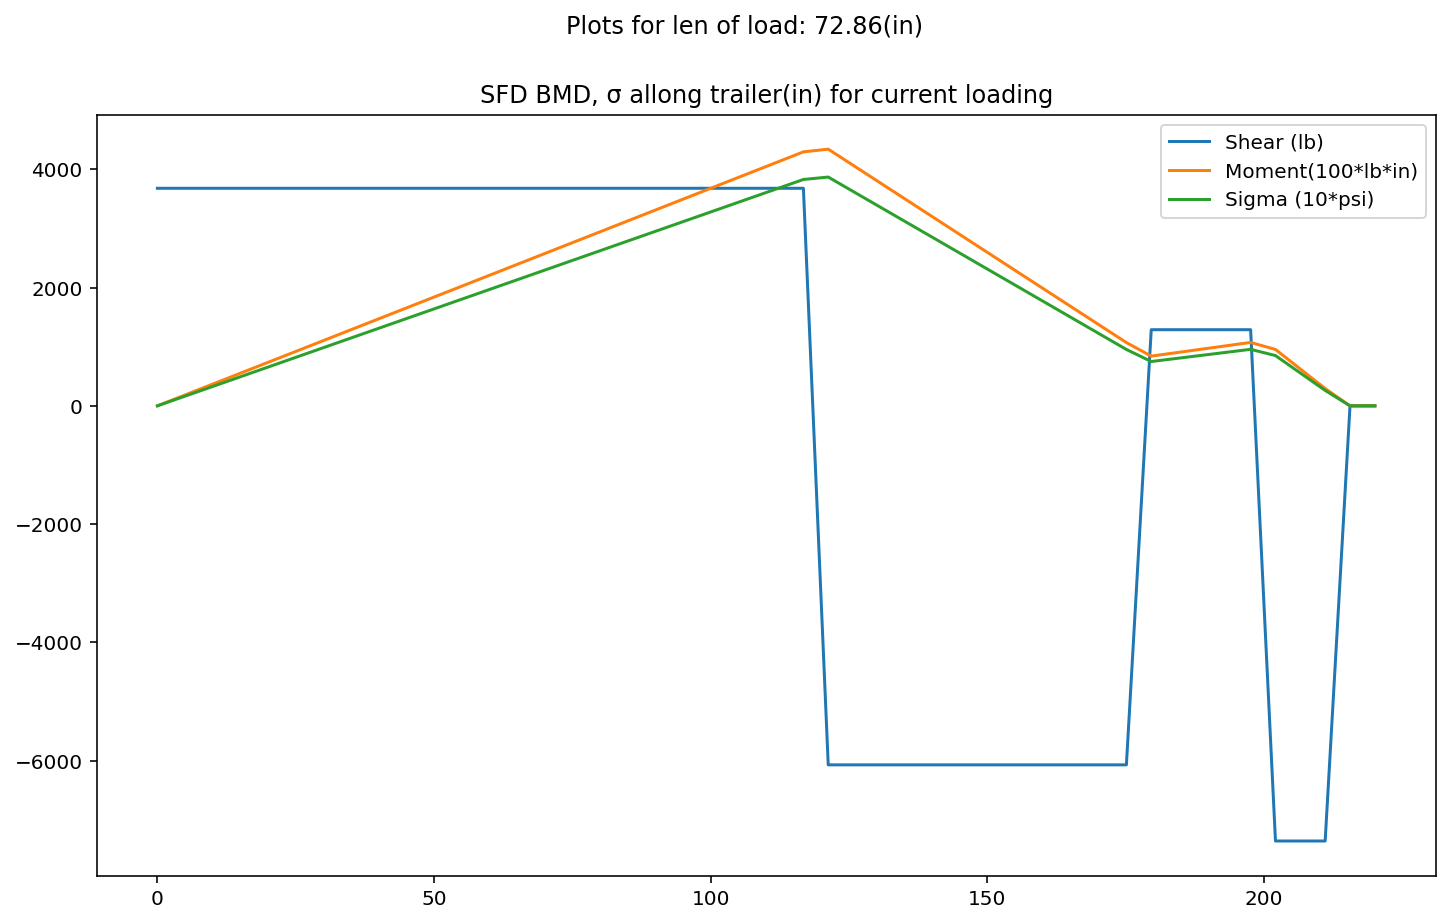

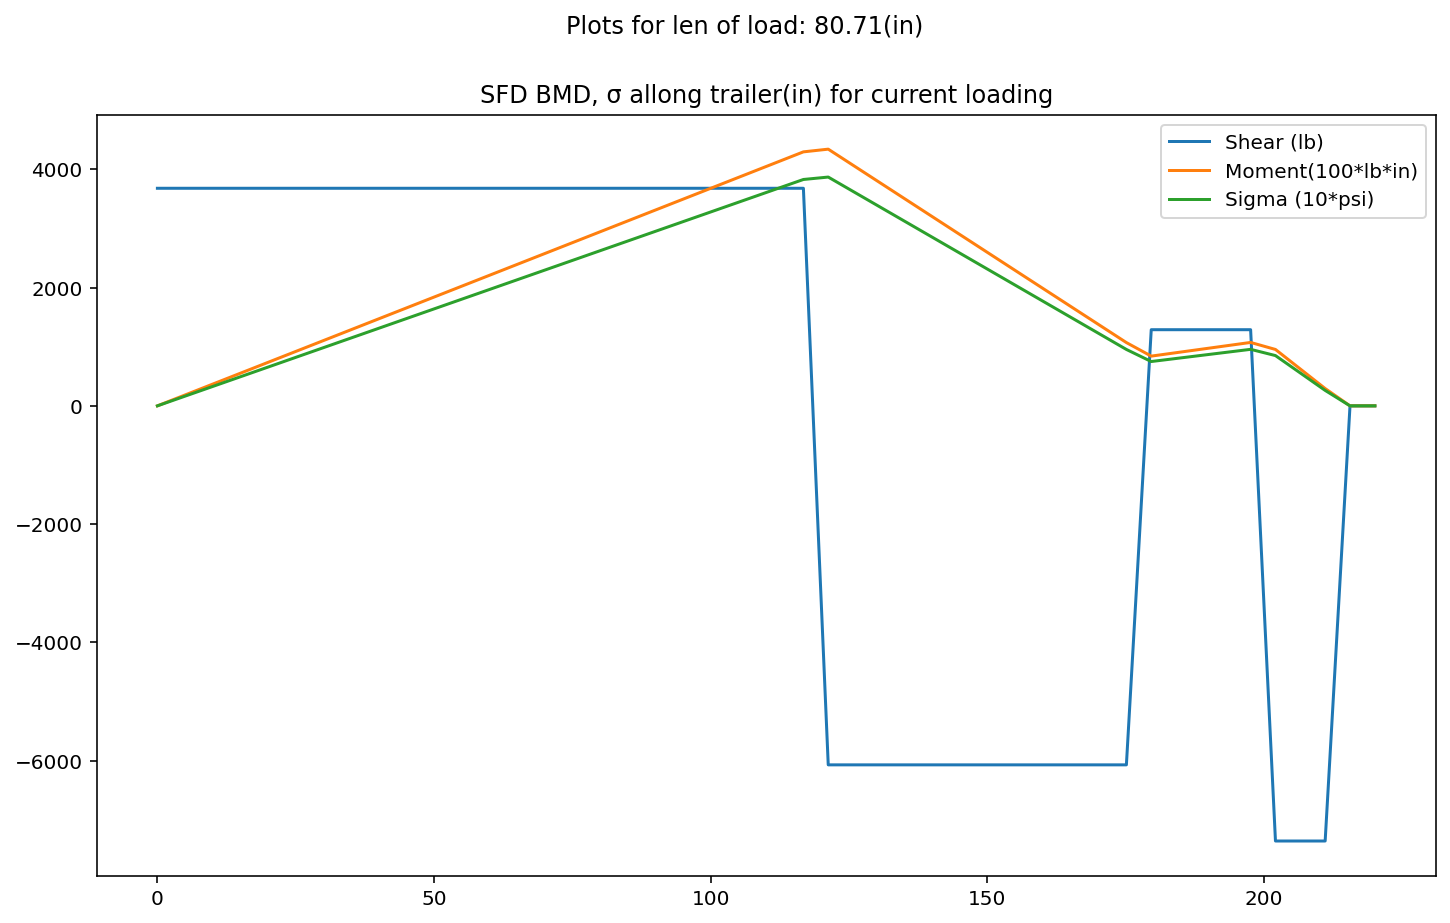

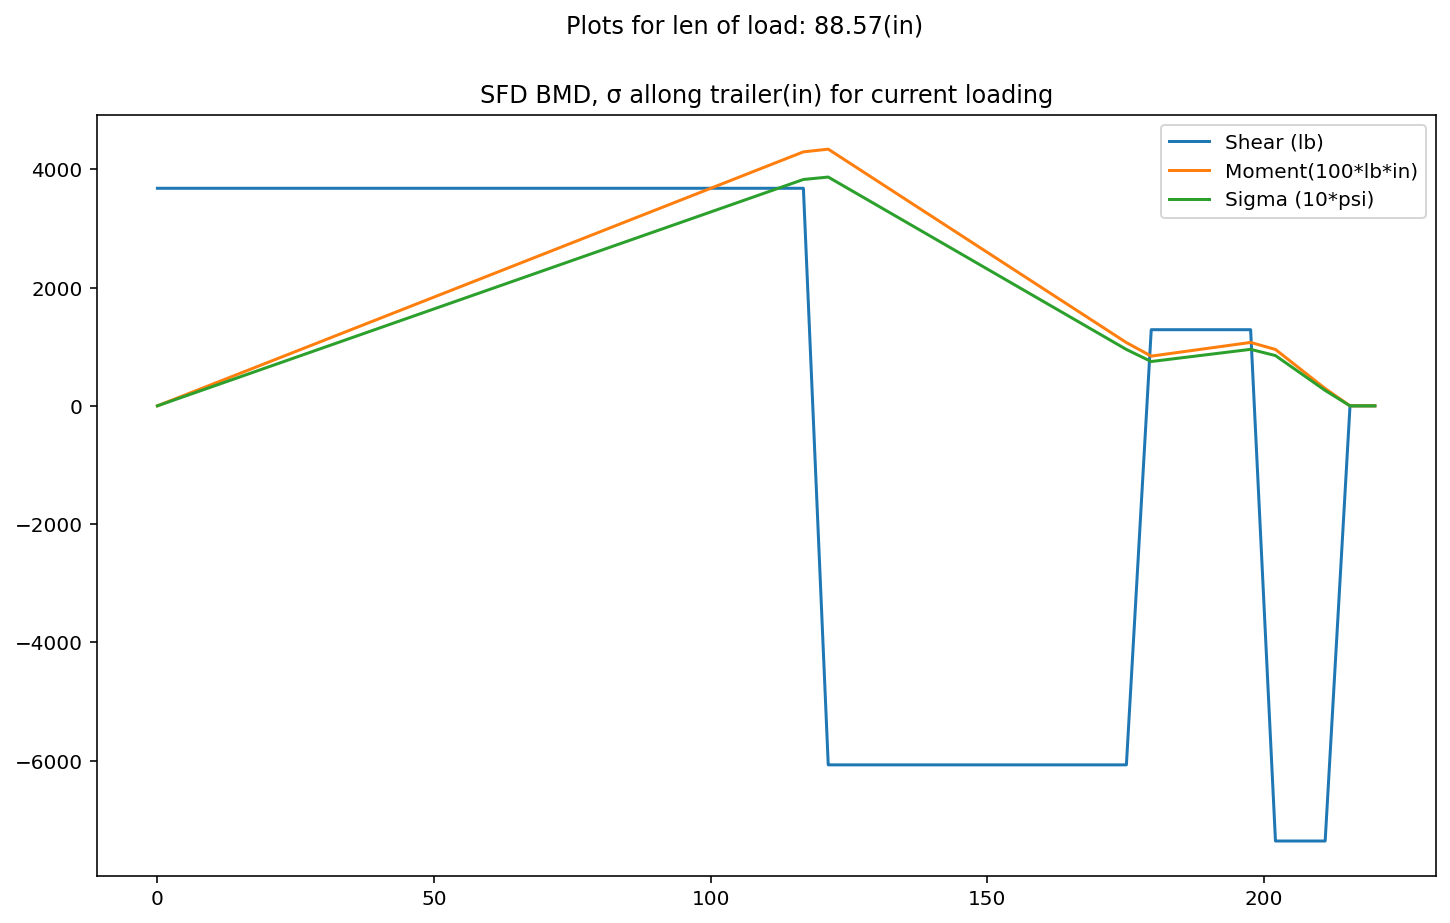

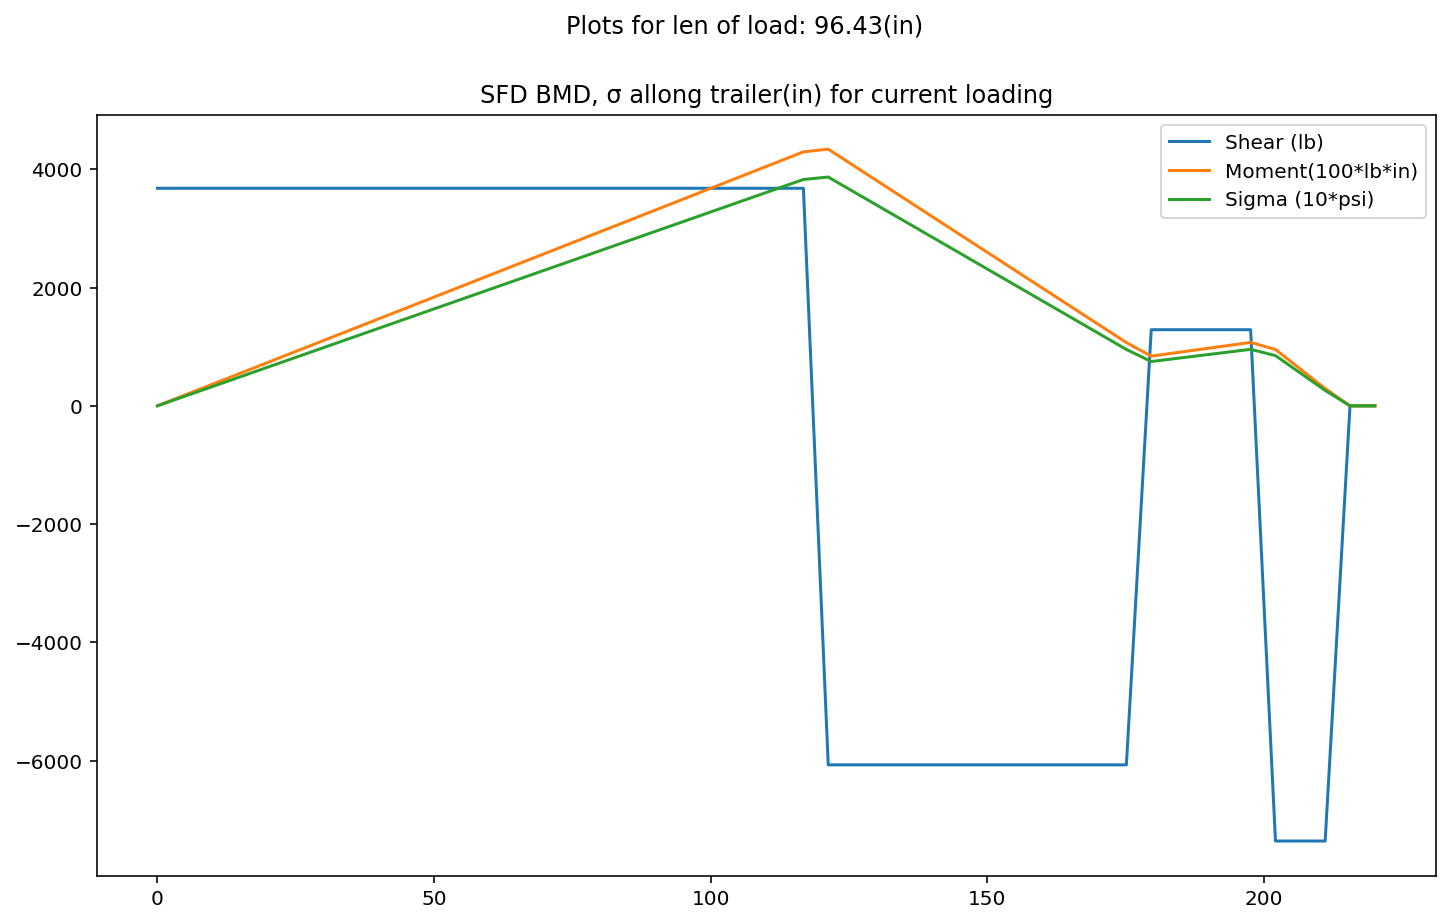

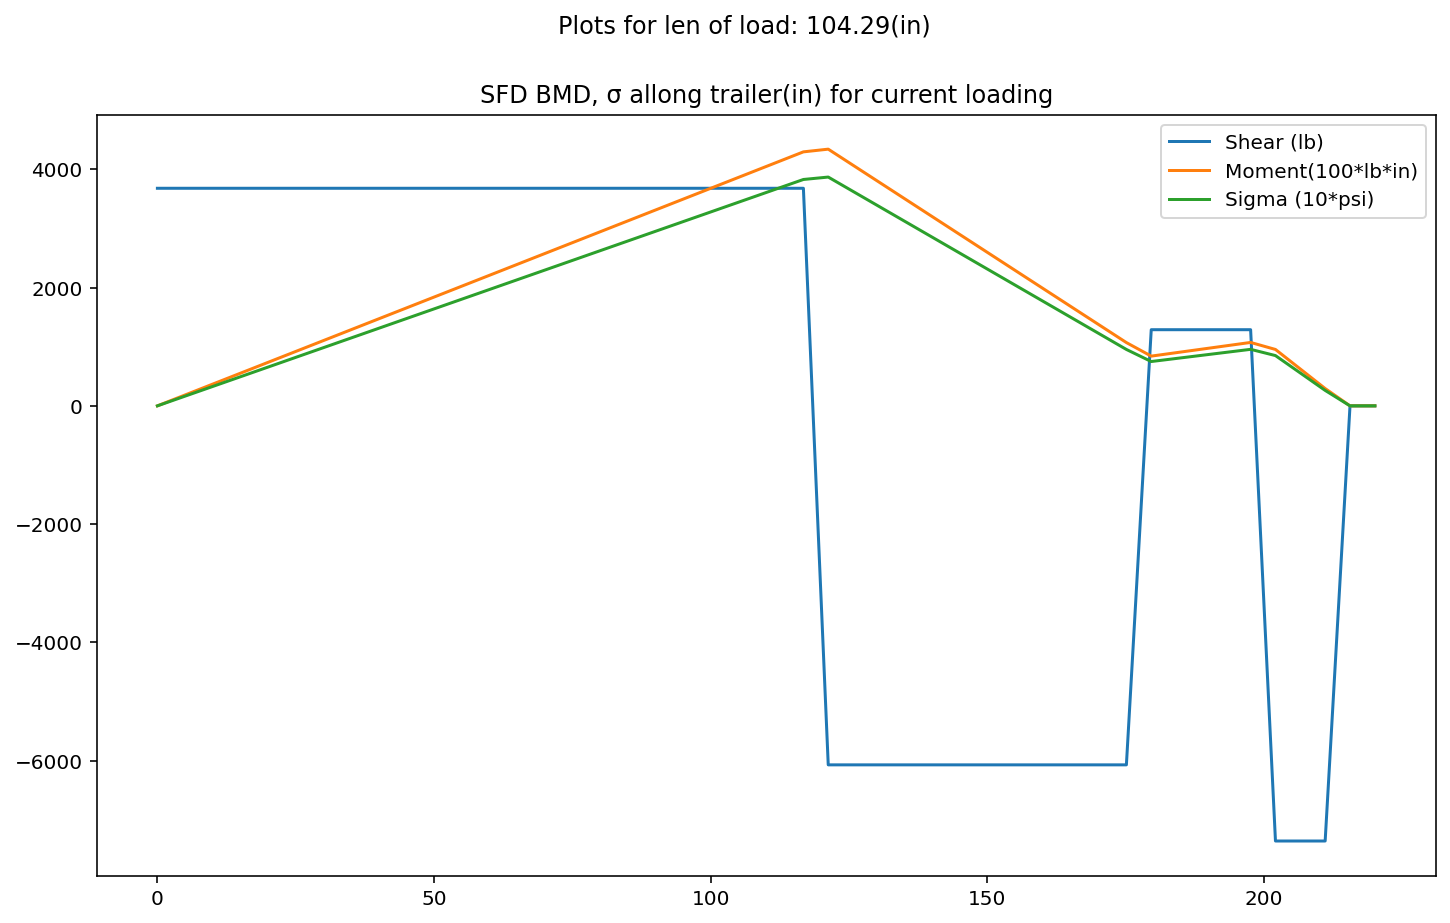

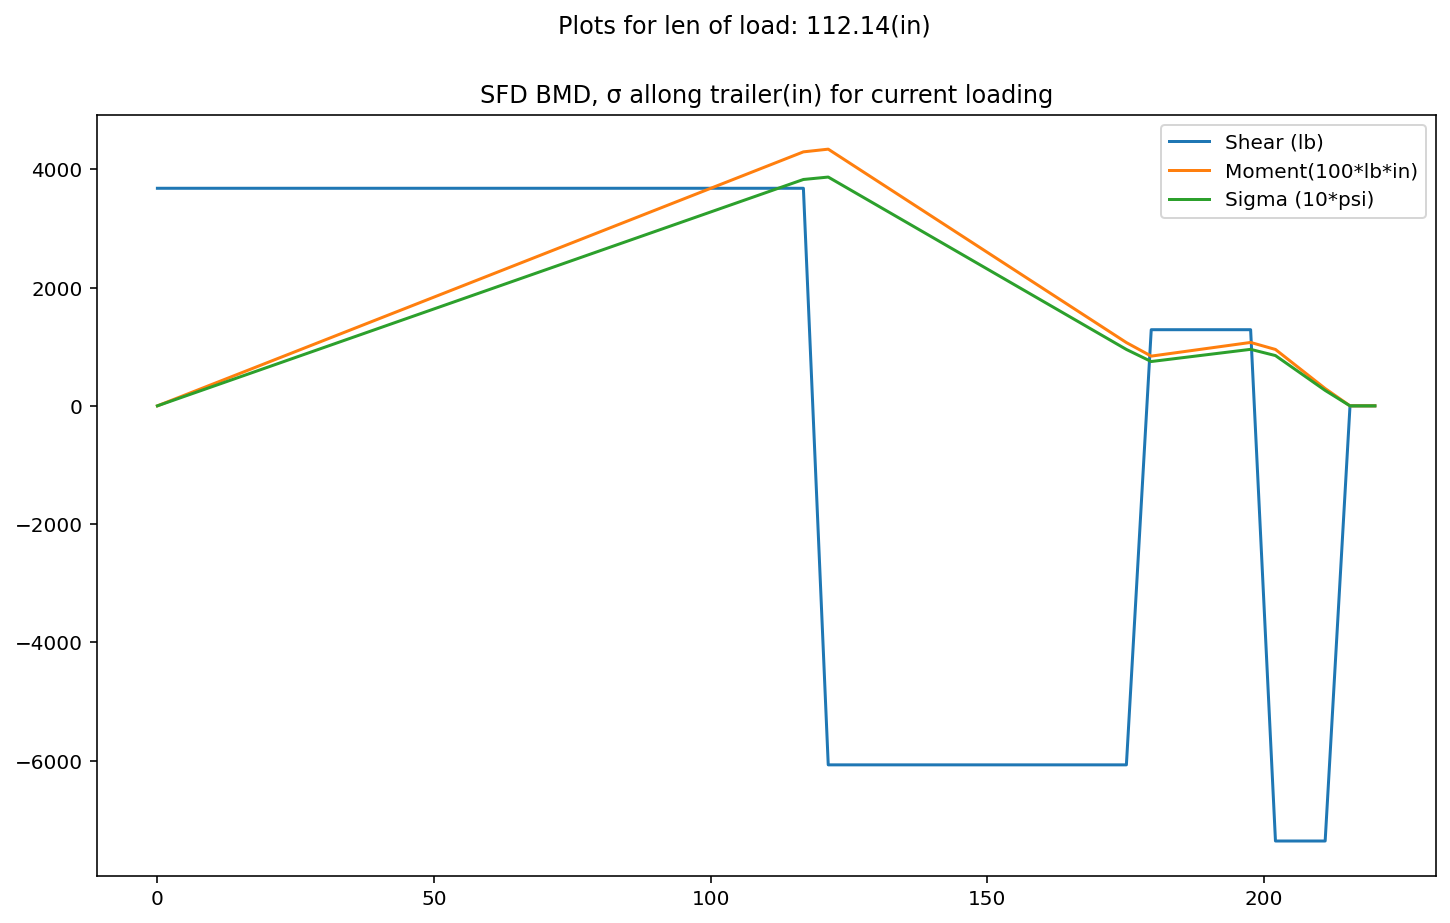

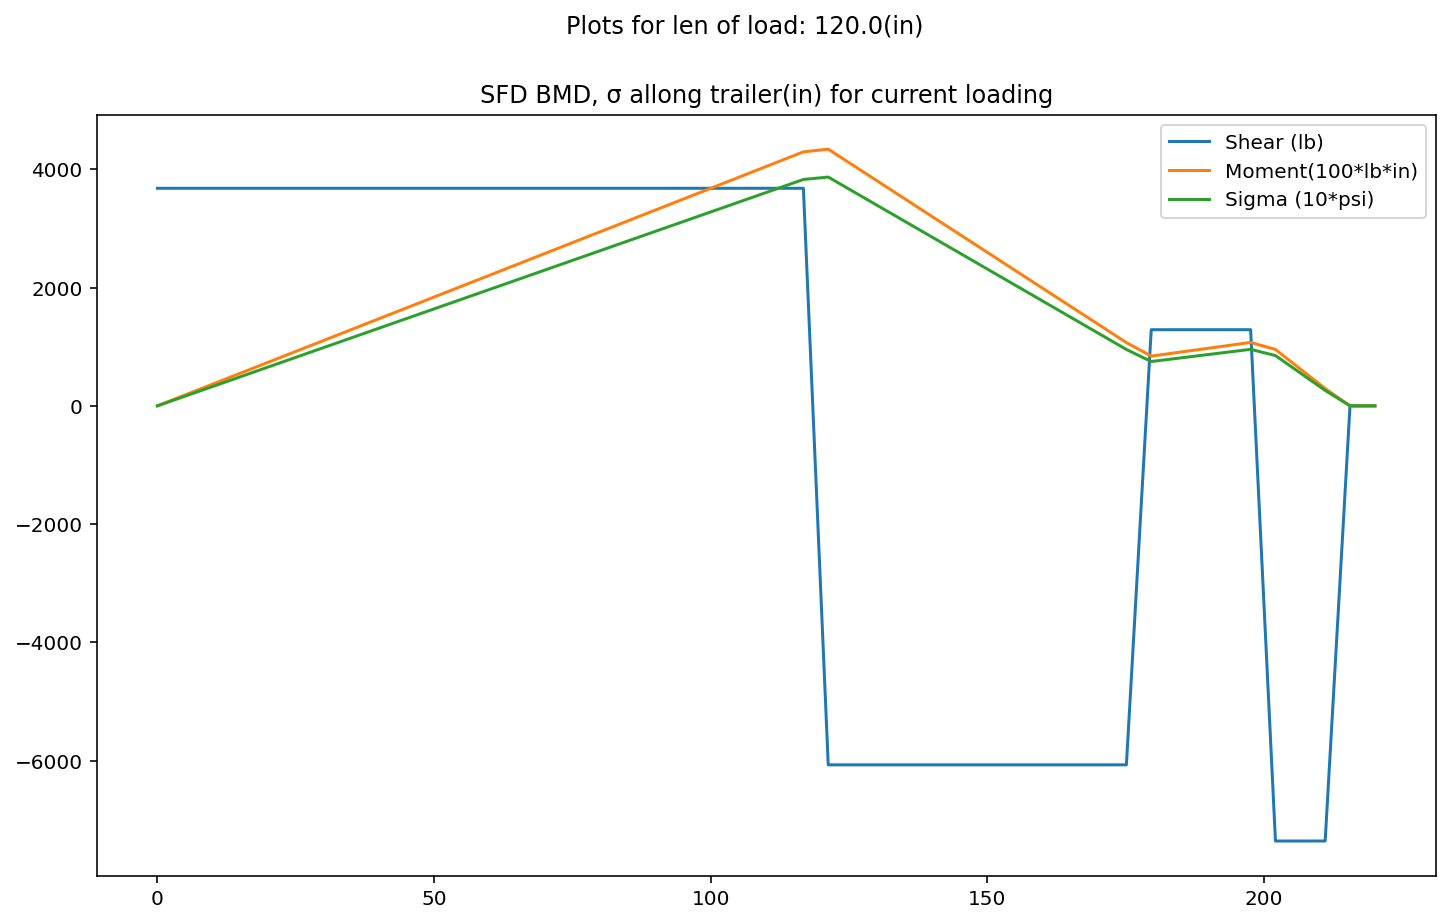

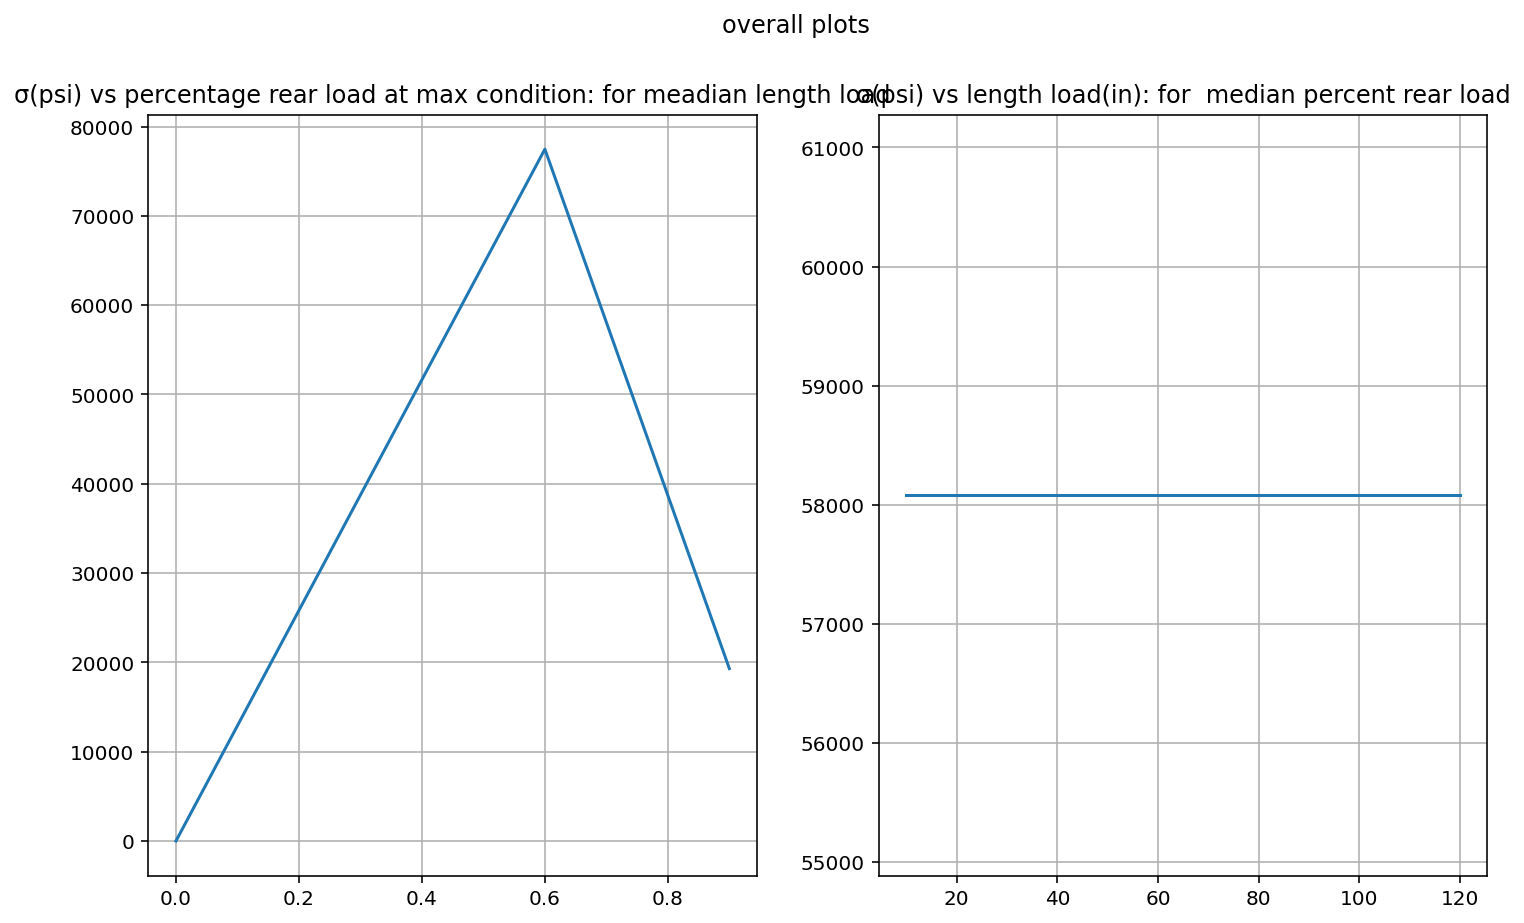

In [6]:
# SFD BMD, \u03C3 vs distance for each condition of len,percent

for ii in range(len(m_full)):
    fig, ax = plt.subplots(1,1)
    m_half_2 = m_full[ii]
    m_half = m_half_2[len(m_half_2)//2]

    ax.plot(xx,m_half[0])
    ax.plot(xx,m_half[1]*1e-2)
    ax.plot(xx,m_half[2]*1e-1)

    ax.legend(['Shear (lb)', 'Moment(100*lb*in)', 'Sigma (10*psi)'])
    fig.suptitle(f'Plots for len of load: {round(lii[ii],2)}(in)')
    ax.set_title('SFD BMD, \u03C3 allong trailer(in) for current loading')
    fig.show()

# init plots
title = ['\u03C3(psi) vs percentage rear load at max condition: for meadian length load', '\u03C3(psi) vs length load(in): for  median percent rear load']

fig, ax = plt.subplots(1,2)
#for same loc
ax[0].plot(max_loc[7][:,0], max_loc[7][:,1])

# for same per
ax[1].plot(lii,[i[i.shape[0]//2,1] for i in max_loc])

# for readbility
fig.suptitle('overall plots')
for iii in range(2):
    ax[iii].grid(True)
    ax[iii].set_title(title[iii])
fig.show()


In [7]:
for i in lii:
    print(i/400)

0.025
0.044642857142857144
0.0642857142857143
0.08392857142857142
0.10357142857142858
0.1232142857142857
0.14285714285714285
0.1625
0.18214285714285716
0.20178571428571426
0.22142857142857142
0.24107142857142858
0.2607142857142857
0.28035714285714286
0.3


In [8]:
lx(0,15,215)

array([0.])

array([-257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -257600.,
       -257600., -257600., -257600., -257600., -257600., -2576

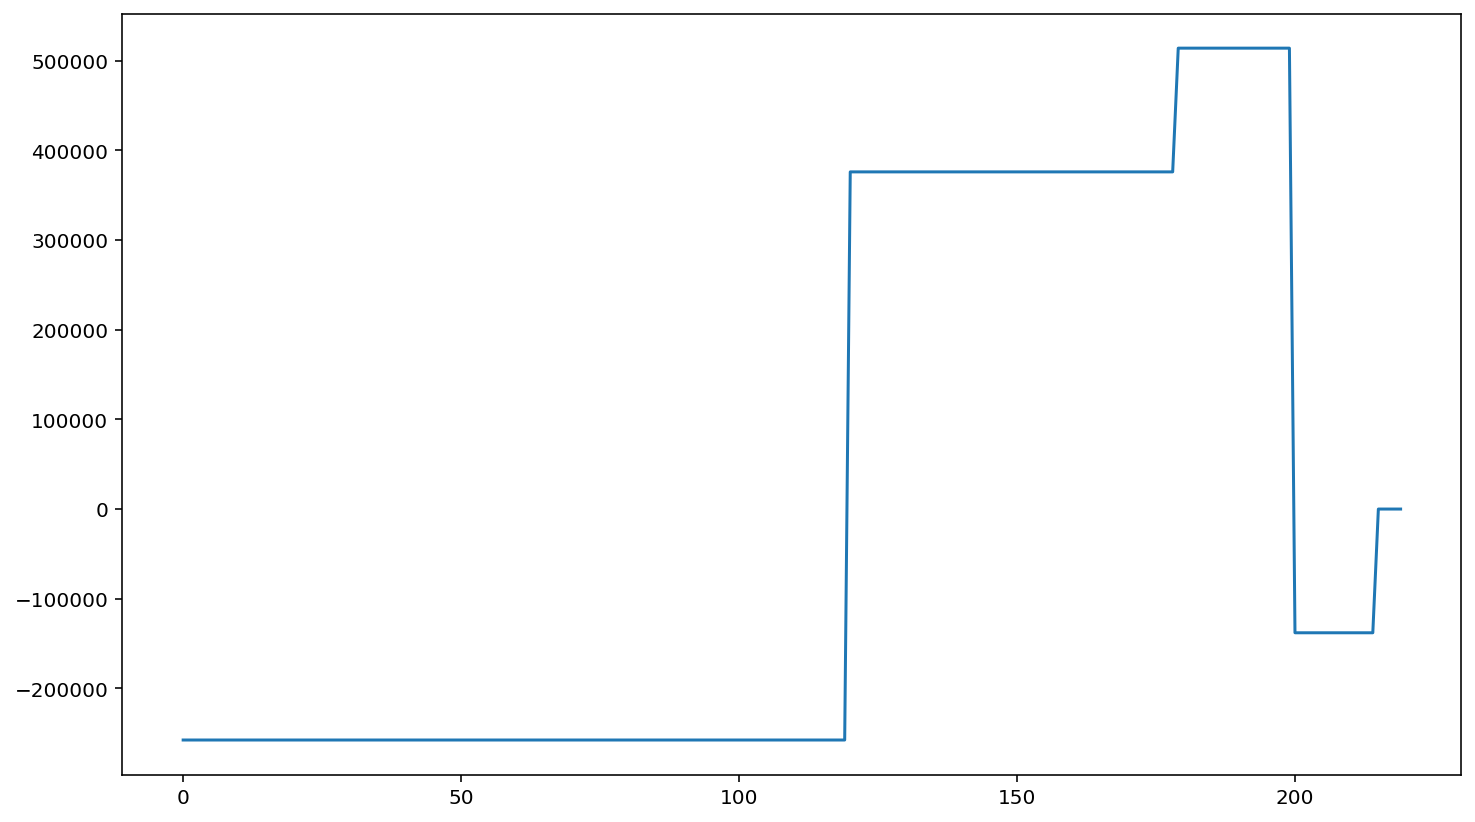

In [9]:
tp =np.arange(0,220)
tx = lx(0,15,tp)
plt.plot(tp,tx)
tx